In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib
from scipy.interpolate import interp2d
import math

%matplotlib inline

CELLSIZE=2.

In [2]:
real_data = np.load('./real_data.npz')
test_data = np.load('./fake_data.npz')

In [3]:
keys = real_data.keys()
print keys
real_imgs = real_data[keys[1]]
real_p = real_data[keys[2]]
real_point = real_data[keys[0]]
print ("rp", real_p[:6])
print ("rpoint", real_point[:6])

fake_imgs = test_data[keys[1]]
fake_p = test_data[keys[2]]
fake_point = test_data[keys[0]]
print ("fp", fake_p[:6])
print ("fpoint", fake_point[:6])


['ParticlePoint', 'EnergyDeposit', 'ParticleMomentum']
('rp', array([[  3.41762018e-01,  -9.72088625e+00,   6.29665497e+01],
       [  2.95278539e-01,  -6.96615237e-01,   6.42744372e+00],
       [ -2.98900408e+00,   5.45502974e-01,   1.52725187e+01],
       [ -3.02356611e-01,  -2.82783136e+00,   1.56125381e+01],
       [ -1.11807686e-01,  -5.55579154e-02,   1.13626661e+00],
       [  9.46516537e-01,  -1.64364965e+00,   7.37408375e+00]]))
('rpoint', array([[ 0.79587719,  0.9827155 ],
       [-0.1329488 , -0.80121486],
       [ 0.08632889, -0.42929944],
       [ 0.05528682,  0.29676876],
       [ 0.54841132,  0.66677703],
       [ 0.54474952, -0.53571484]]))
('fp', array([[  0.6093899 ,  -8.28188992,  59.95389938],
       [  0.33261722,  -0.7849834 ,   6.93473482],
       [ -2.65877533,   0.61810684,  15.19773102],
       [ -0.21448737,  -2.65385389,  15.79986954],
       [  0.17250802,   0.11432596,   1.73289824],
       [  0.94914645,  -1.30618036,   7.71630478]], dtype=float32))
('fpo

In [4]:
len(real_point)

29600

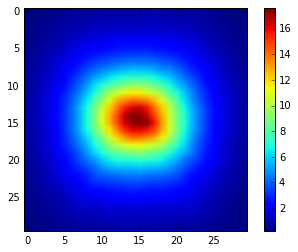

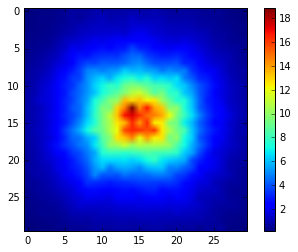

In [5]:
plt.imshow(np.mean(real_imgs, axis=0)) # средняя картинка по реальному датасету
plt.colorbar()
plt.show()
plt.imshow(np.mean(fake_imgs, axis=0))
plt.colorbar()
plt.show()

In [6]:
for i in range(10):
    print "event",  i
    print "E %4.1f" % sum(real_p[i]*real_p[i])**0.5
    print "px/pz %5.3f" % (real_p[i,0]/real_p[i,2])
    print "py/pz %5.3f" % (-real_p[i,1]/real_p[i,2])
    

event 0
E 63.7
px/pz 0.005
py/pz 0.154
event 1
E  6.5
px/pz 0.046
py/pz 0.108
event 2
E 15.6
px/pz -0.196
py/pz -0.036
event 3
E 15.9
px/pz -0.019
py/pz 0.181
event 4
E  1.1
px/pz -0.098
py/pz 0.049
event 5
E  7.6
px/pz 0.128
py/pz 0.223
event 6
E  7.1
px/pz 0.074
py/pz -0.072
event 7
E  8.3
px/pz -0.076
py/pz -0.077
event 8
E  4.3
px/pz -0.255
py/pz 0.442
event 9
E  1.1
px/pz -0.089
py/pz -0.176


im: 0
real [  0.34176202  -9.72088625  62.96654969]
fake [  0.6093899   -8.28188992  59.95389938]


/opt/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: RuntimeWarning: divide by zero encountered in log10


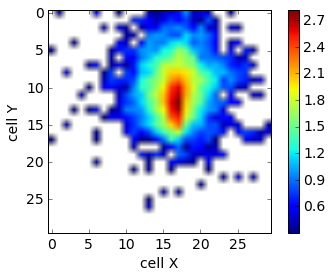

/opt/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:12: RuntimeWarning: divide by zero encountered in log10


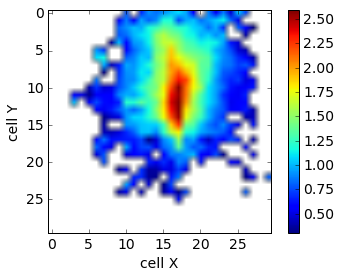

im: 1
real [ 0.29527854 -0.69661524  6.42744372]
fake [ 0.33261722 -0.7849834   6.93473482]


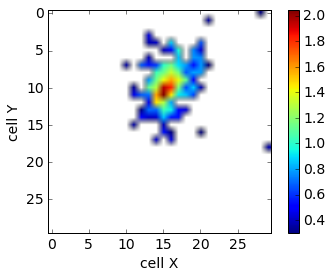

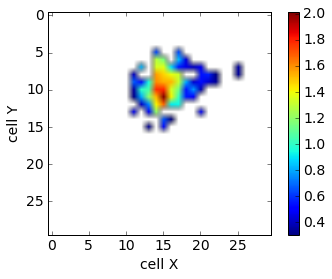

im: 2
real [ -2.98900408   0.54550297  15.27251869]
fake [ -2.65877533   0.61810684  15.19773102]


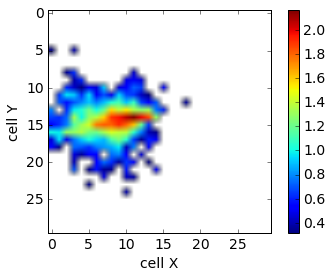

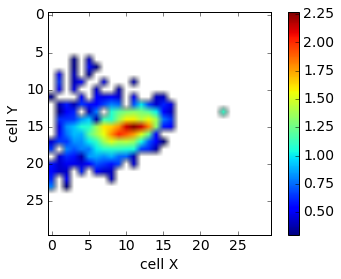

im: 3
real [ -0.30235661  -2.82783136  15.61253812]
fake [ -0.21448737  -2.65385389  15.79986954]


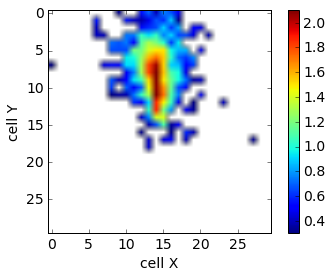

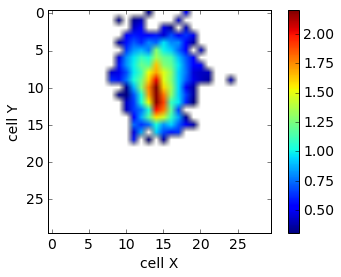

im: 4
real [-0.11180769 -0.05555792  1.13626661]
fake [ 0.17250802  0.11432596  1.73289824]


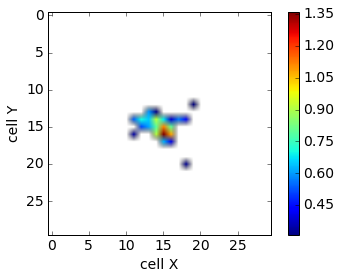

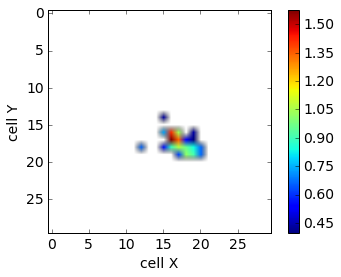

im: 5
real [ 0.94651654 -1.64364965  7.37408375]
fake [ 0.94914645 -1.30618036  7.71630478]


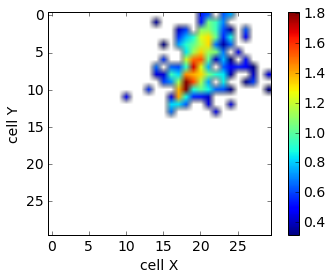

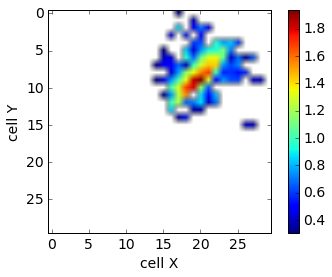

im: 6
real [ 0.5262993   0.51189678  7.07573416]
fake [ 0.93994129  0.1730873   7.94099379]


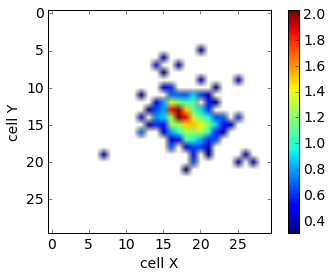

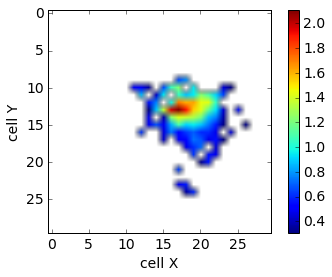

im: 7
real [-0.62599281  0.63515147  8.28081001]
fake [-0.31194913  0.49833363  8.77775192]


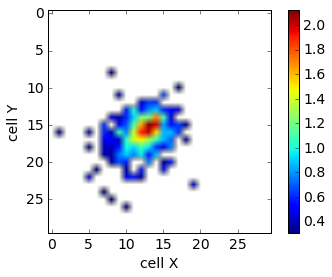

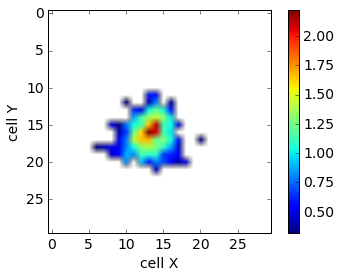

im: 8
real [-0.97365827 -1.68641206  3.8138172 ]
fake [-0.79090154 -1.50719404  5.1017704 ]


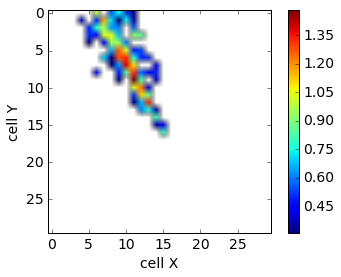

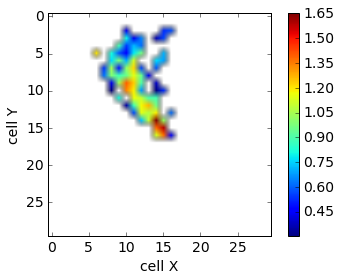

im: 9
real [-0.09186403  0.18191828  1.03529626]
fake [ 0.11780775  0.10676363  1.80046964]


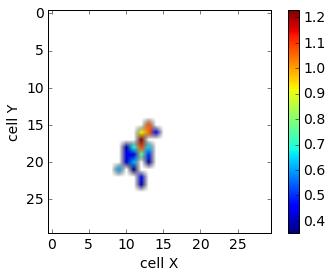

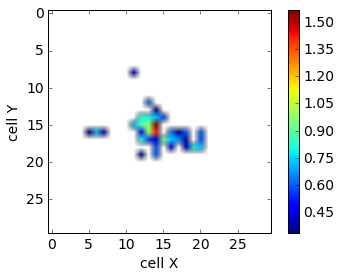

In [7]:
matplotlib.rcParams.update({'font.size': 14})
for i in range (10):
    print "im:", i
    print "real", real_p[i]
    print "fake", fake_p[i]
    plt.imshow(np.log10(real_imgs[i])) 
#    plt.imshow(real_imgs[i]) 
    plt.colorbar()
    plt.xlabel('cell X')
    plt.ylabel('cell Y')
    plt.show()
    plt.imshow(np.log10(fake_imgs[i]))
#    plt.imshow(fake_imgs[i])
    plt.colorbar()
    plt.xlabel('cell X')
    plt.ylabel('cell Y')
    plt.show()

In [8]:
def newline(p1, p2):
    # функция отрисовки прямой
    ax = plt.gca()
    xmin, xmax = ax.get_xbound()

    if(p2[0] == p1[0]):
        xmin = xmax = p1[0]
        ymin, ymax = ax.get_ybound()
    else:
        ymax = p1[1]+(p2[1]-p1[1])/(p2[0]-p1[0])*(xmax-p1[0])
        ymin = p1[1]+(p2[1]-p1[1])/(p2[0]-p1[0])*(xmin-p1[0])

    l = mlines.Line2D([xmin,xmax], [ymin,ymax])
    ax.add_line(l)
    return l

In [9]:
x = np.linspace(-14.5, 14.5, 30)
y = np.linspace(-14.5, 14.5, 30)

xx, yy = np.meshgrid(x, y)

In [10]:
# пример наклонной на одной из картинок
zoff = 25.
ipic = 3
print(real_point[ipic])
print (real_p[ipic])

point = real_point[ipic]
p = real_p[ipic]
orth = np.array([-p[1], p[0]])

pref = point[:2] + p[:2]*zoff/p[2]

#p1 = point[:2] - 10 * p[:2]
#p2 = point[:2] + 10 * p[:2]
#p3 = point[:2] - 10 * orth
#p4 = point[:2] + 10 * orth
p1 = pref - 10 * p[:2]
p2 = pref + 10 * p[:2]
p3 = pref - 10 * orth
p4 = pref + 10 * orth
print(real_point[ipic])
print (real_p[ipic])

[ 0.05528682  0.29676876]
[ -0.30235661  -2.82783136  15.61253812]
[ 0.05528682  0.29676876]
[ -0.30235661  -2.82783136  15.61253812]


/opt/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':


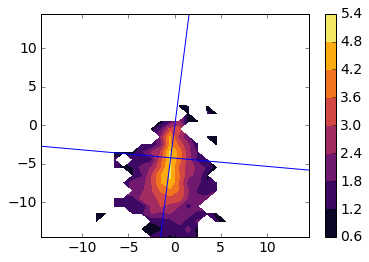

In [11]:
plt.contourf(xx, yy, np.log(real_imgs[ipic]), cmap=plt.cm.inferno)
#plt.hist2d(xx, yy, np.log(real_imgs[ipic]), cmap=plt.cm.inferno)
# plt.xlim([-5, 5])
# plt.ylim([-5, 5])
newline(p1, p2)
newline(p3, p4)
plt.colorbar()

In [12]:
def get_assymetry(data, ps, points, orthog=False):
    # асимметрия ливня вдоль и поперек направнения наклона
    first = True
    assym_res = []
    for i in range(len(data)):
        img = data[i]
        p = ps[i]
        #print('momentum', p)
        point = points[i, :2]
#        zoff = 50
        zoff = 25
        point0 = point[0] + zoff*p[0]/p[2]
        point1 = point[1] + zoff*p[1]/p[2]
    
        if orthog:
            line_func = lambda x: (x - point0) / p[0] * p[1] + point1
        else:
            line_func = lambda x: -(x - point0) / p[1] * p[0] + point1
    
    
    
        x = np.linspace(-14.5, 14.5, 30)
        y = np.linspace(-14.5, 14.5, 30)

        xx, yy = np.meshgrid(x, y)
    
        idx = np.where(yy - line_func(xx) < 0)
        if (not orthog and p[1]<0):
            idx = np.where(yy - line_func(xx) > 0)
    
        zz = np.ones((30, 30))
        zz[idx] = 0
    
        assym = (np.sum(img * zz) - np.sum(img * (1 - zz))) / np.sum(img)
        assym_res.append(assym)
        
#        if (first and assym > 0.999):
#            print ("Iteration ", i)
#            print ("Momentum :", ps[i])
#            print ("Point: ", points[i])
#            print ("Correction: ", 50.*p[0]/p[2], 50.*p[1]/p[2])
#            print ("Corrected: ", point0, point1)
#            plt.imshow(np.log10(img))
#            first = False
#            break
    return assym_res

In [13]:
assymetry_direct_real = get_assymetry(real_imgs, real_p, real_point)
assymetry_perp_real = get_assymetry(real_imgs, real_p, real_point, orthog=True)
assymetry_direct_fake = get_assymetry(fake_imgs, fake_p, fake_point)
assymetry_perp_fake = get_assymetry(fake_imgs, fake_p, fake_point, orthog=True)

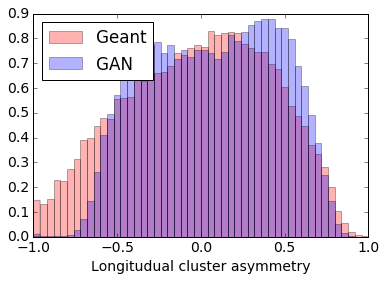

In [29]:
matplotlib.rcParams.update({'font.size': 14})
plt.hist(assymetry_direct_real, bins=50, range=[-1,1], color='red', alpha=0.3, normed=True, label='Geant');
#plt.title('Energy assymetry in direction')
plt.hist(assymetry_direct_fake, bins=50, range=[-1,1], color='blue', alpha=0.3, normed=True, label='GAN');
plt.xlabel('Longitudual cluster asymmetry')
plt.legend(loc='best')
plt.savefig('longAsymmetry.pdf')

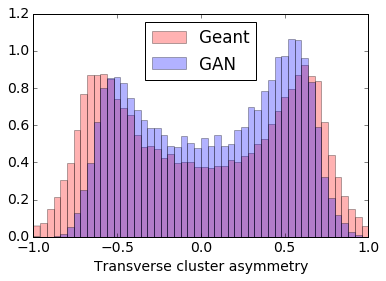

In [15]:
matplotlib.rcParams.update({'font.size': 14})
plt.hist(assymetry_perp_real, bins=50, range=[-1,1], color='red', alpha=0.3, normed=True, label='Geant');
#plt.title('Energy assymetry in ortogonal')
plt.hist(assymetry_perp_fake, bins=50, range=[-1,1], color='blue', alpha=0.3, normed=True, label='GAN');
plt.xlabel('Transverse cluster asymmetry')
plt.legend(loc='best')

In [16]:
def get_shower_width(data, ps, points, orthog=False):
    
    # ширина ливня вдоль и поперек направления
    
    res = []
    spreads = []
    
    for i in range(10000):
        
        img = data[i]
        p = ps[i]
        point = points[i]
        zoff = 25
        point0 = point[0] + zoff*p[0]/p[2]
        point1 = point[1] + zoff*p[1]/p[2]
        
        if orthog:
            line_func = lambda x: -(x - point0) / p[0] * p[1] + point1
        else:
            line_func = lambda x:  (x - point0) / p[1] * p[0] + point1
    
        x = np.linspace(-14.5, 14.5, 30)
        y = np.linspace(-14.5, 14.5, 30)

        bb = interp2d(x, y, img, kind='cubic')

        x_ = np.linspace(-14.5, 14.5, 100)

        y_ = line_func(x_)
        
        rescale = np.sqrt(1+(p[1]/p[0])*(p[1]/p[0]))

#        vals = []
        sum0 = 0
        sum1 = 0
        sum2 = 0
        for i in range(100):
#            vals.append(bb(x_[i], y_[i]))
            ww = bb(x_[i], y_[i])
            if ww < 0: ww = 0
            sum0 += ww
            sum1 += rescale*x_[i]*ww
            sum2 += (rescale*x_[i])*(rescale*x_[i])*ww
            
#        vals_ = np.std(vals)
        sum1 = sum1/sum0
        sum2 = sum2/sum0
        if sum2 >= sum1*sum1 :
            sigma = np.sqrt (sum2 - sum1*sum1)
            spreads.append(sigma[0])
        else:
#            print sum2, sum1*sum1, sum2-sum1*sum1 
            spreads.append(0)
        
    return spreads

In [17]:
shower_width_real_direct = get_shower_width(real_imgs, real_p, real_point)
shower_width_real_perp = get_shower_width(real_imgs, real_p, real_point, orthog=True)
shower_width_fake_direct = get_shower_width(fake_imgs, fake_p, fake_point)
shower_width_fake_perp = get_shower_width(fake_imgs, fake_p, fake_point, orthog=True)

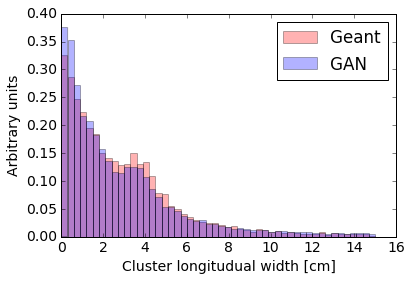

In [19]:
matplotlib.rcParams.update({'font.size': 14})
plt.hist(shower_width_real_direct, bins=50, range=[0,15], normed=True, alpha=0.3, color='red', label='Geant');
plt.hist(shower_width_fake_direct, bins=50, range=[0,15], normed=True, alpha=0.3, color='blue', label='GAN');
#plt.title('Shower longitudial width')
plt.legend(loc='best')
plt.xlabel('Cluster longitudual width [cm]')
plt.ylabel('Arbitrary units')
plt.savefig('width.long.pdf')

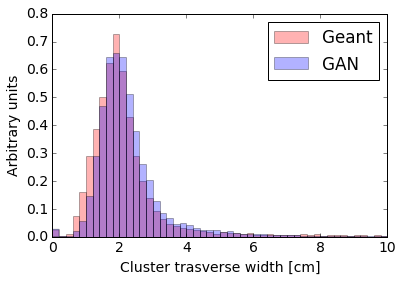

In [20]:
matplotlib.rcParams.update({'font.size': 14})
plt.hist(shower_width_real_perp, bins=50, range=[0,10], normed=True, alpha=0.3, color='red', label='Geant');
plt.hist(shower_width_fake_perp, bins=50, range=[0,10], normed=True, alpha=0.3, color='blue', label='GAN');
#plt.title('Shower transverse width')
plt.legend(loc='best')
plt.xlabel('Cluster trasverse width [cm]')
plt.ylabel('Arbitrary units')

In [21]:
def get_ms_ratio(data, ps, i, alpha=0.1):
    
    img = data[i]
    p = ps[i]
    
    ms = np.sqrt(np.sum(p**2))
    
    ms_ = ms * alpha
    
    num = np.sum((img >= ms_))
    
    return num / 900.0

In [22]:
def get_ms_ratio2(data, ps, i, alpha=0.1):
    
    img = data[i]
    
    ms = np.sum(img)
    
    ms_ = ms * alpha
    
    num = np.sum((img >= ms_))
    
    return num / 900.

In [23]:
#alpha = np.linspace(0, 0.02, 100)
alpha = np.linspace(-5, 0, 50)
sparsity_real = []
sparsity_fake = []

for i in range(3000):
    v_r = []
    v_f = []
    for alpha_ in alpha:
        v_r.append(get_ms_ratio2(real_imgs, real_p, i, pow(10,alpha_)))
        v_f.append(get_ms_ratio2(fake_imgs, fake_p, i, pow(10,alpha_)))
        
    sparsity_real.append(v_r)
    sparsity_fake.append(v_f)

In [24]:
res_r = np.array(sparsity_real)
res_f = np.array(sparsity_fake)

means_r = np.mean(res_r, axis=0)
stddev_r = np.std(res_r, axis=0)

means_f = np.mean(res_f, axis=0)
stddev_f = np.std(res_f, axis=0)

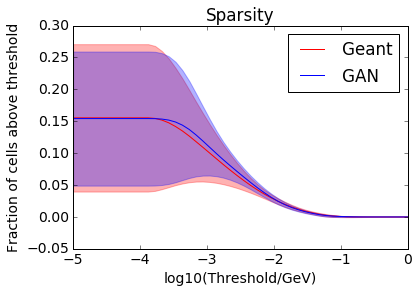

In [25]:
matplotlib.rcParams.update({'font.size': 14})
plt.plot(alpha, means_r, color='red')
plt.fill_between(alpha, means_r-stddev_r, means_r+stddev_r, color='red', alpha=0.3)
plt.plot(alpha, means_f, color='blue')
plt.fill_between(alpha, means_f-stddev_f, means_f+stddev_f, color='blue', alpha=0.3)
plt.legend(['Geant', 'GAN'])
plt.title('Sparsity')
plt.xlabel('log10(Threshold/GeV)')
plt.ylabel('Fraction of cells above threshold')

In [26]:
def get_energies(data, ps):
    
    E = []
    E0 = []
    
    for i in range(len(data)):
        
        img = data[i]
        p = ps[i]
        
        E.append(np.sum(img))
        E0.append(np.sqrt(np.sum(p**2)))
        
    return E, E0

RMS(E/E_init / <E/E_init>)

In [27]:
ps_r = []
for i in range(len(real_p)):
    ps_r.append(np.sqrt(np.sum(real_p[i]**2)))
    
ps_f = []
for i in range(len(fake_p)):
    ps_f.append(np.sqrt(np.sum(fake_p[i]**2)))

99.9936089605
100.991


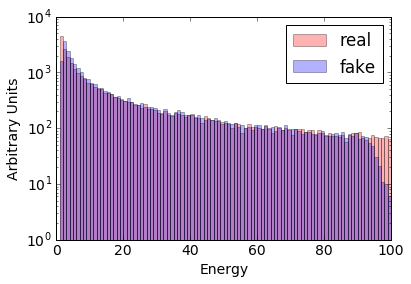

In [28]:
print(np.max(ps_r))
print(np.max(ps_f))
plt.hist (ps_r, 100, range= [0, 100], log=True, color='red', alpha=0.3)
plt.hist (ps_f, 100, range= [0, 100], log=True, color='blue', alpha=0.3)
plt.legend(['real', 'fake'])
plt.xlabel('Energy')
plt.ylabel('Arbitrary Units')

In [ ]:
x_r = []
for i in range(len(real_p)):
    x_r.append(real_p[i,0]/real_p[i,2])
x_f = []
for i in range(len(fake_p)):
    x_f.append(fake_p[i,0]/fake_p[i,2])
plt.hist (x_r, 100, range= [-1, 1], color='red', alpha=0.3)
plt.hist (x_f, 100, range= [-1, 1], color='blue', alpha=0.3)
plt.legend(['real', 'fake'])
plt.xlabel('px/pz')
plt.ylabel('Arbitrary Units')

In [ ]:
x_r = []
for i in range(len(real_p)):
    x_r.append(real_p[i,1]/real_p[i,2])
x_f = []
for i in range(len(fake_p)):
    x_f.append(fake_p[i,1]/fake_p[i,2])
plt.hist (x_r, 100, range= [-1, 1], color='red', alpha=0.3)
plt.hist (x_f, 100, range= [-1, 1], color='blue', alpha=0.3)
plt.legend(['real', 'fake'])
plt.xlabel('py/pz')
plt.ylabel('Arbitrary Units')

In [ ]:
def get_shift(data, points, p):
    
    shifts = []
    zoff = 25.
    
    for i in range(len(data)):
        
        img = data[i]
        x = np.linspace(-14.5, 14.5, 30)
        y = np.linspace(-14.5, 14.5, 30)
        
        m_y = np.sum(img * x[:, None]) / np.sum(img)
        m_x = np.sum(img * x[None, :]) / np.sum(img)
#        point = points[i,:2]
        point = points[i,:2] + zoff* p[i,:2]/p[i,2]
        
        shifts.append(point - (m_x, m_y))
        #print(m_x, m_y)
        #print(point)
    return shifts

In [ ]:
pxpz_r = []
pxpz_f = []

for i in range(len(real_p)):
    pxpz_r.append(real_p[i][0] / real_p[i][2])
    pxpz_f.append(fake_p[i][0] / fake_p[i][2])
    
    
pypz_r = []
pypz_f = []

for i in range(len(real_p)):
    pypz_r.append(real_p[i][1] / real_p[i][2])
    pypz_f.append(fake_p[i][1] / fake_p[i][2])

In [ ]:
shifts_r = get_shift(real_imgs, real_point, real_p)
shifts_r = np.array(shifts_r)

shifts_f = get_shift(fake_imgs, fake_point, fake_p)
shifts_f = np.array(shifts_f)

In [ ]:
matplotlib.rcParams.update({'font.size': 14})
plt.hist2d(np.array(pxpz_r), shifts_r[:, 0], bins=[50, 50], range= [[-0.5, 0.5],[-10, 10]], normed=True, cmap=plt.cm.inferno);
plt.ylabel('$\Delta X$ [cm]')
plt.xlabel('$p_{x}/p_{z}$')
plt.title('Geant')
plt.colorbar()
plt.show()
plt.hist2d(np.array(pxpz_f), shifts_f[:, 0], bins=[50, 50], range= [[-0.5, 0.5],[-10, 10]], normed=True, cmap=plt.cm.inferno);
plt.ylabel('$\Delta X$ [cm]')
plt.xlabel('$p_{x}/p_{z}$')
plt.title('GAN')
plt.colorbar()
plt.show()

In [ ]:
matplotlib.rcParams.update({'font.size': 14})
plt.hist(shifts_r[:, 0], bins=50, range= [-10, 10], normed=True, alpha=0.3, color='red', label='Geant');
plt.hist(shifts_f[:, 0], bins=50, range= [-10, 10], normed=True, alpha=0.3, color='blue', label='GAN');
plt.xlabel('$\Delta X$ [cm]')
plt.legend(['Geant', 'GAN'])
plt.show()
print 'RMS: Geant:', np.std(shifts_r[:, 0]), 'GAN:', np.std(shifts_f[:, 0])

In [ ]:
matplotlib.rcParams.update({'font.size': 14})
plt.hist2d(np.array(pypz_r), shifts_r[:, 1], bins=[50, 50], range= [[-0.5, 0.5],[-10, 10]], normed=True, cmap=plt.cm.inferno);
plt.ylabel('y shift')
plt.xlabel('py/pz')
#plt.axis([-0.4, 0.4, -10, 10])
plt.colorbar()
plt.show()
plt.hist2d(np.array(pypz_f), shifts_f[:, 1], bins=[50, 50], range= [[-0.5, 0.5],[-10, 10]], normed=True, cmap=plt.cm.inferno);
plt.ylabel('y shift')
plt.xlabel('py/pz')
plt.colorbar()
plt.show()

In [ ]:
def get_shift_ms(data, ps, points):
    
    shifts = []
    
    for i in range(len(data)):
        
        img = data[i]
        p = ps[i]
        
        x = np.linspace(-15, 15, 30)
        y = np.linspace(-15, 15, 30)
        
        m_x = np.sum(img * x[:, None]) / np.sum(img) + 50 * (p[0] / p[2])
        m_y = np.sum(img * x[None, :]) / np.sum(img) + 50 * (p[1] / p[2])
        point = points[i][:2]
        
        shifts.append(point - (m_x, m_y))
        #print(m_x, m_y)
        #print(point)
    return shifts

In [ ]:
new_shifts_r = get_shift_ms(real_imgs, real_p, real_point)
new_shifts_r = np.array(new_shifts_r)

new_shifts_f = get_shift_ms(fake_imgs, fake_p, fake_point)
new_shifts_f = np.array(new_shifts_f)

In [ ]:
plt.hist2d(new_shifts_r[:, 0], np.array(pxpz_r), bins=[50, 50], normed=True, cmap=plt.cm.inferno);
plt.xlabel('x shift new')
plt.ylabel('px/pz')
plt.colorbar()
plt.show()
plt.hist2d(new_shifts_f[:, 0], np.array(pxpz_f), bins=[50, 50], normed=True, cmap=plt.cm.inferno);
plt.xlabel('x shift new')
plt.ylabel('px/pz')
plt.colorbar()
plt.show()

In [ ]:
plt.hist2d(new_shifts_r[:, 0], np.array(pypz_r), bins=[50, 50], normed=True, cmap=plt.cm.inferno);
plt.xlabel('x shift new')
plt.ylabel('py/pz')
plt.colorbar()
plt.show()
plt.hist2d(new_shifts_f[:, 0], np.array(pypz_f), bins=[50, 50], normed=True, cmap=plt.cm.inferno);
plt.xlabel('x shift new')
plt.ylabel('py/pz')
plt.colorbar()
plt.show()

In [ ]:
plt.hist2d(new_shifts_r[:, 1], np.array(pypz_r), bins=[50, 50], normed=True, cmap=plt.cm.inferno);
plt.xlabel('y shift new')
plt.ylabel('py/pz')
plt.colorbar()
plt.show()
plt.hist2d(new_shifts_f[:, 1], np.array(pypz_f), bins=[50, 50], normed=True, cmap=plt.cm.inferno);
plt.xlabel('y shift new')
plt.ylabel('py/pz')
plt.colorbar()
plt.show()